
<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Magíster en Data Science</em><br>
    <em>Profesor: Víctor Navarro Aránguiz</em><br>

</div>

# Python para Data Science: Proyecto final
*15 de Julio de 2024*

**Fecha de Entrega**: 04 de Agosto de 2024

**Objetivos:**
  - Aplicar los conceptos aprendidos en clases.
  - Realizar el análisis de un dataset de su preferencia.
  - Familiarizarse con el manejo de versiones a través de Git.

**Puntaje Total:** 5 Puntos

**Nombre Estudiante(s)**: `Giuseppe Lavarello`

### Análisis Exploratorio
##### Importe de Paquetes


In [1]:
# Para manipulación de data 
import numpy as np
import pandas as pd

# Para visualización de data
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno #de NaNs



##### Carga de Datos

In [2]:
df0 = pd.read_csv("..\\data\\raw\\winequality-white.csv", sep=";")

##### Recopilación de información básica sobre los datos

In [3]:
# Mostrar las primeras 10 filas de los datos

df0.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [4]:
# Mostrar 10 filas aleatorias de los datos

df0.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3440,6.8,0.17,0.32,1.4,0.040,35.0,106.0,0.99026,3.16,0.66,12.0,5
3354,5.9,0.20,0.28,12.8,0.038,29.0,132.0,0.99426,3.31,0.57,11.8,7
2166,7.0,0.35,0.31,1.8,0.069,15.0,162.0,0.99440,3.18,0.47,9.4,5
4831,5.8,0.38,0.26,1.1,0.058,20.0,140.0,0.99271,3.27,0.43,9.7,6
1831,7.4,0.49,0.24,15.1,0.030,34.0,153.0,0.99530,3.13,0.51,12.0,7
453,6.0,0.27,0.27,1.6,0.046,32.0,113.0,0.99240,3.41,0.51,10.5,7
1505,9.2,0.18,0.49,1.5,0.041,39.0,130.0,0.99450,3.04,0.49,9.8,7
3375,7.8,0.22,0.26,9.0,0.047,38.0,132.0,0.99700,3.25,0.53,10.2,6
1354,7.8,0.13,0.30,1.8,0.040,43.0,179.0,0.99550,3.43,0.41,9.0,5
586,7.4,0.26,0.30,7.9,0.049,38.0,157.0,0.99630,3.13,0.48,8.9,6


# Informacion de las columnas

| Columna                 | Cuenta de No Nulos | Dtype   |
|-------------------------|----------------|---------|
| fixed acidity           | 4898   | float64 |
| volatile acidity        | 4898   | float64 |
| citric acid             | 4898   | float64 |
| residual sugar          | 4898   | float64 |
| chlorides               | 4898   | float64 |
| free sulfur dioxide     | 4898   | float64 |
| total sulfur dioxide    | 4898   | float64 |
| density                 | 4898   | float64 |
| pH                      | 4898   | float64 |
| sulphates               | 4898   | float64 |
| alcohol                 | 4898   | float64 |
| quality                 | 4898   | int64   |

[Click aqui para informacion detallada de cada caracteristica](https://www.oiv.int/standards/compendium-of-international-methods-of-wine-and-must-analysis)

- **fixed acidity**: La acidez fija, medida en **meq/L**, se calcula a partir de la diferencia entre la acidez total y la acidez volátil.
- **volatile acidity**: La acidez volátil, expresada en **meq/L**, se deriva de los ácidos de la serie acética presentes en el vino en estado libre y combinados como sales.
- **citric acid**:  La cantidad de acido citrico precente en el vino, medido en **mg/L**.
- **residual sugar**: El azúcar residual, medido en **gr/L**, que proviene de los azúcares naturales de la uva que quedan en el vino después de que finaliza la fermentación alcohólica.
- **chlorides**: Numero de **mL** de compuestos conteniendo iones negativos de Cloro o que tiene un enlase unico con un atomo de CL.
- **free sulfur dioxide**: El dióxido de azufre libre, medido en **mg/L**, se define como el dióxido de azufre presente en el mosto o vino en las siguientes formas: H₂SO₃ y HSO₃⁻.
- **total sulfur dioxide**: El dióxido de azufre total, medido en **mg/L**, se define como la suma de todas las formas diferentes de dióxido de azufre presentes en el vino.
- **density**: La densidad del vino, medida en **g/mL**
- **pH**: El pH del vino, medido en unidades de **pH**
- **sulphates**: Los sulfatos son sales derivadas del ácido sulfúrico (H₂SO₄), medido en **mg/L**
- **alcohol**: La graduación alcohólica por volumen (ABV). Se expresa como **% vol.**.
- **quality**: La medición subjetiva de la calidad del vino.


##### Recopilación de información básica sobre el conjunto de datos

In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


##### Recopilación de estadísticas descriptivas sobre los datos

In [6]:
df0.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


##### Mostrar el tamaño del DataFrame

In [7]:
df0.shape

(4898, 12)

##### Visualizar NaNs

<Axes: >

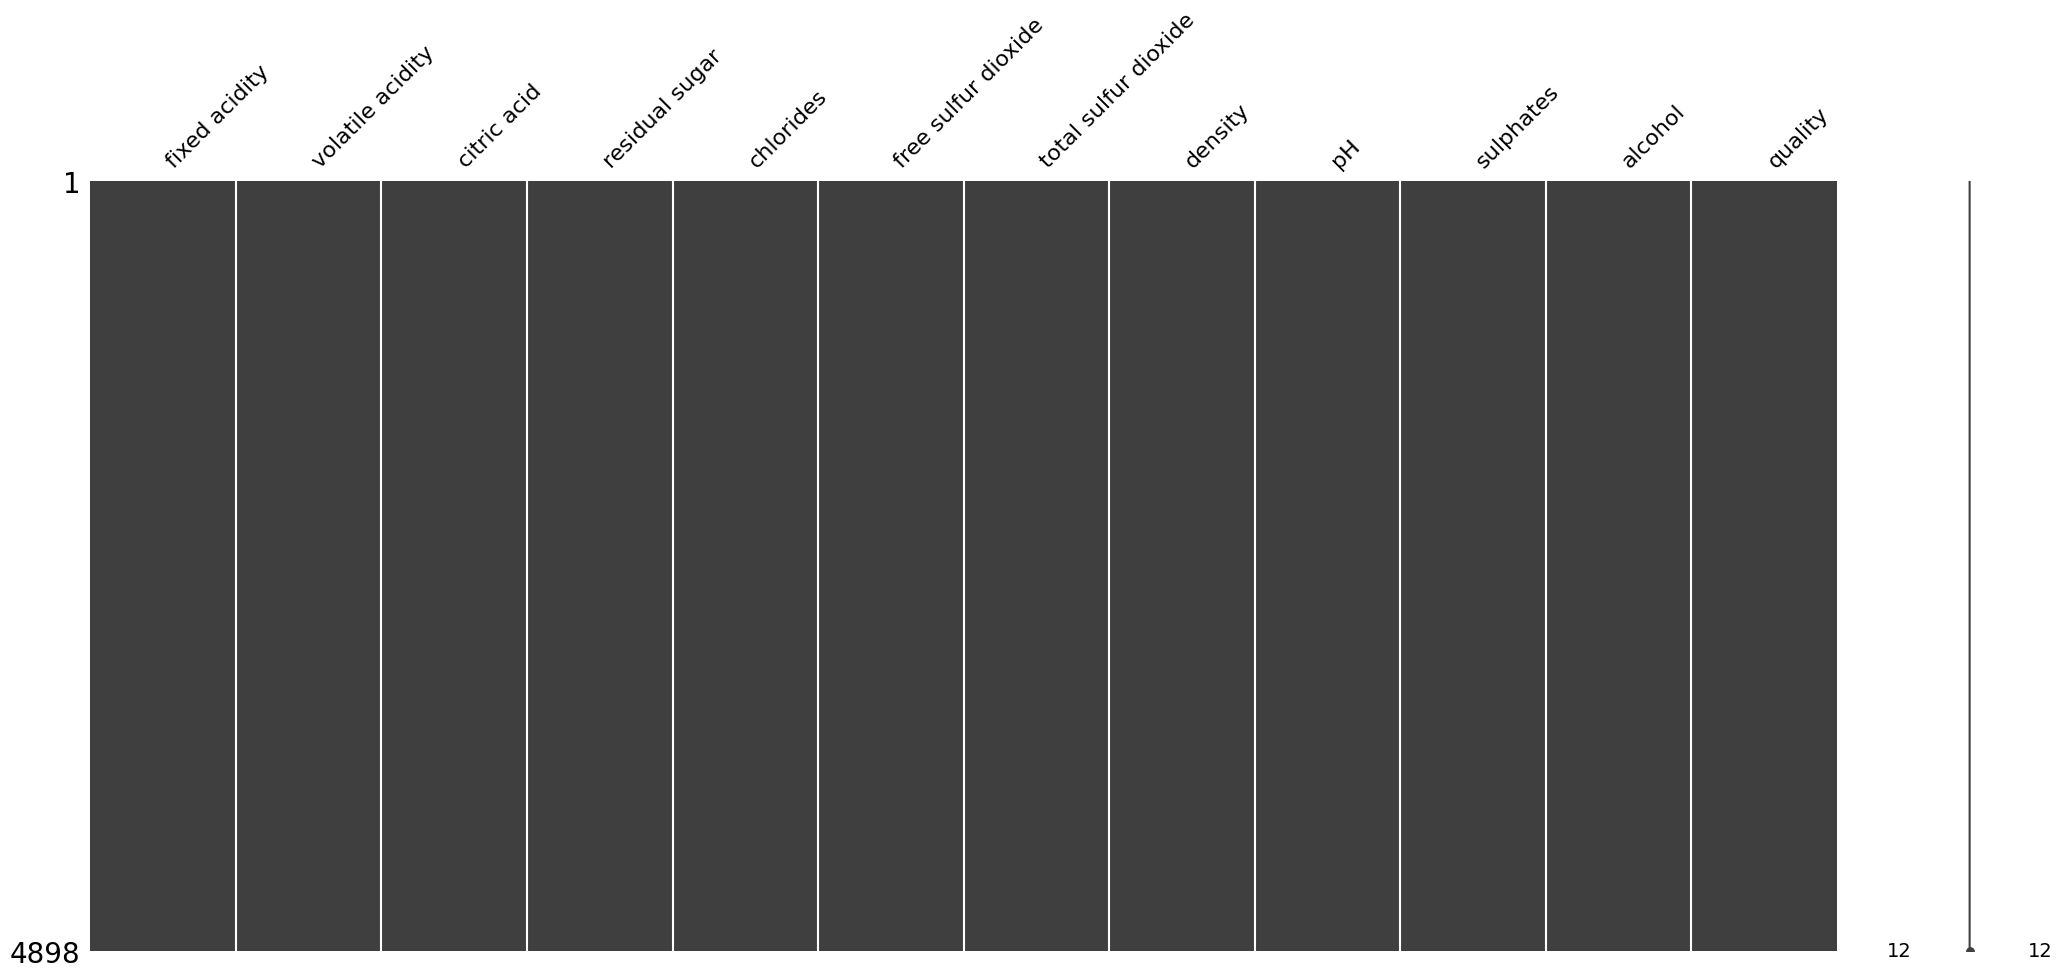

In [8]:
msno.matrix(df0)

##### Buscamos duplicados

In [31]:

df0[df0.duplicated(keep="first")].copy()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.800000,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4828,6.4,0.23,0.35,10.3,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,5
4850,7.0,0.36,0.35,2.5,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6
4851,6.4,0.33,0.44,8.9,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5
4856,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6
